Irene Font Peradejordi 15/02/2019

# Hands-on Exercise 1: The Perceptron

In this hands-on exercise you use Python code to experiment with the Perceptron.

## Implement the Perceptron and train it on the sonar dataset
**1. What are the features of the dataset and what do they represent?**

They are sonar signals bounced off from a metal cylinder and a roughly cylindrical rock. The task is to classify them with a high accuracy.


**2. What performance do you achieve as a function of the learning rate?**

Learning Rate: Used to limit the amount each weight is corrected each time it is updated.

Epochs: The number of times to run through the training data while updating the weight.

**3. Can you interpret the weights of the perceptron in terms of the classification task at hand?**

### 1. Making Predictions

In [48]:
#Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [49]:
# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


### 2. Training Network Weights

In [52]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [53]:
# Calculate weights
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


### 3. Modeling the Sonar Dataset

In [54]:
# Perceptron Algorithm on the Sonar Dataset
from random import seed
from random import randrange
from csv import reader

In [55]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [56]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [57]:
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [58]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [59]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [60]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

In [61]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [62]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights

In [63]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

In [64]:
# Test the Perceptron algorithm on the sonar dataset
seed(1)
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)

In [65]:
len(dataset[0])

61

In [66]:
type(dataset)

list

In [67]:
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)

{'R': 0, 'M': 1}

In [68]:
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [81.15942028985508, 69.56521739130434, 62.31884057971014]
Mean Accuracy: 71.014%


---------

Create a small-sized dataset (10-100 images per class) for a binary decision task. For instance,
using (grey-value) images of frontal faces, your task may be gender classification. Two important
things to note: (1) don’t make the image too large in terms of resolution (32x32 pixels seems
fine), and (2) all images should be normalised as much as possible, so that noses and eyes are
all aligned. Instead of faces, you may also come up with other image sets that have two clear
distinct classes.
Train your perceptron on the binary decision task. Just use a single train and test set (1-fold
cross validation).

In [1]:
import matplotlib

In [2]:
import PIL

In [3]:
from PIL import Image
import numpy as np

In [4]:
i = Image.open('OlivettiFaces(1)/face 1.tif')
iar = np.asarray(i)
print(iar)

[[ 75  89 101 ...  90  80  74]
 [ 83  98 106 ...  90  82  76]
 [ 83 101 109 ...  92  82  72]
 ...
 [ 52  50  54 ...  37  40  42]
 [ 49  51  51 ...  36  39  40]
 [ 49  50  49 ...  37  39  38]]


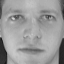

In [5]:
i

In [6]:
np.shape(iar)

(64, 64)

In [7]:
iar_vector = np.reshape(iar,(64*64))

In [8]:
iar_vector

array([ 75,  89, 101, ...,  37,  39,  38], dtype=uint8)

In [9]:
np.shape(iar_vector)

(4096,)

In [10]:
list(iar_vector)

[75,
 89,
 101,
 107,
 128,
 147,
 159,
 164,
 167,
 166,
 170,
 169,
 168,
 169,
 167,
 168,
 167,
 169,
 170,
 170,
 169,
 171,
 172,
 174,
 176,
 183,
 187,
 188,
 188,
 183,
 184,
 189,
 184,
 186,
 183,
 179,
 180,
 179,
 180,
 174,
 174,
 173,
 174,
 174,
 175,
 176,
 178,
 173,
 175,
 174,
 173,
 172,
 170,
 171,
 169,
 164,
 159,
 153,
 137,
 127,
 108,
 90,
 80,
 74,
 83,
 98,
 106,
 114,
 134,
 151,
 162,
 166,
 167,
 166,
 168,
 167,
 169,
 170,
 169,
 168,
 171,
 172,
 172,
 173,
 172,
 170,
 174,
 176,
 178,
 184,
 188,
 190,
 189,
 188,
 187,
 191,
 190,
 187,
 185,
 181,
 180,
 179,
 178,
 174,
 174,
 174,
 174,
 174,
 174,
 175,
 176,
 174,
 176,
 174,
 174,
 175,
 171,
 170,
 169,
 163,
 159,
 154,
 146,
 124,
 107,
 90,
 82,
 76,
 83,
 101,
 109,
 124,
 139,
 156,
 164,
 167,
 168,
 168,
 169,
 167,
 170,
 171,
 171,
 170,
 171,
 172,
 172,
 173,
 174,
 173,
 176,
 178,
 178,
 186,
 190,
 191,
 188,
 188,
 194,
 193,
 191,
 189,
 184,
 186,
 180,
 178,
 177,
 174,
 17

In [11]:
np.ndarray.tolist(iar_vector)

[75,
 89,
 101,
 107,
 128,
 147,
 159,
 164,
 167,
 166,
 170,
 169,
 168,
 169,
 167,
 168,
 167,
 169,
 170,
 170,
 169,
 171,
 172,
 174,
 176,
 183,
 187,
 188,
 188,
 183,
 184,
 189,
 184,
 186,
 183,
 179,
 180,
 179,
 180,
 174,
 174,
 173,
 174,
 174,
 175,
 176,
 178,
 173,
 175,
 174,
 173,
 172,
 170,
 171,
 169,
 164,
 159,
 153,
 137,
 127,
 108,
 90,
 80,
 74,
 83,
 98,
 106,
 114,
 134,
 151,
 162,
 166,
 167,
 166,
 168,
 167,
 169,
 170,
 169,
 168,
 171,
 172,
 172,
 173,
 172,
 170,
 174,
 176,
 178,
 184,
 188,
 190,
 189,
 188,
 187,
 191,
 190,
 187,
 185,
 181,
 180,
 179,
 178,
 174,
 174,
 174,
 174,
 174,
 174,
 175,
 176,
 174,
 176,
 174,
 174,
 175,
 171,
 170,
 169,
 163,
 159,
 154,
 146,
 124,
 107,
 90,
 82,
 76,
 83,
 101,
 109,
 124,
 139,
 156,
 164,
 167,
 168,
 168,
 169,
 167,
 170,
 171,
 171,
 170,
 171,
 172,
 172,
 173,
 174,
 173,
 176,
 178,
 178,
 186,
 190,
 191,
 188,
 188,
 194,
 193,
 191,
 189,
 184,
 186,
 180,
 178,
 177,
 174,
 17

In [12]:
mujeres = []
for i in range (71,81):
    mujeres.append(list(np.reshape(np.asarray(Image.open("OlivettiFaces(1)/face {}.tif".format(i))),(64*64))))

In [13]:
len(mujeres)

10

In [15]:
np.shape(mujeres)

(10, 4096)

In [14]:
mujeres

[[45,
  47,
  78,
  127,
  160,
  187,
  199,
  203,
  204,
  204,
  206,
  207,
  206,
  205,
  206,
  205,
  207,
  207,
  207,
  207,
  207,
  207,
  206,
  207,
  207,
  206,
  205,
  199,
  194,
  190,
  189,
  185,
  182,
  176,
  168,
  153,
  137,
  127,
  120,
  112,
  105,
  93,
  84,
  79,
  68,
  66,
  67,
  64,
  62,
  64,
  66,
  66,
  72,
  73,
  66,
  58,
  57,
  57,
  56,
  54,
  54,
  47,
  46,
  43,
  42,
  52,
  88,
  138,
  171,
  190,
  201,
  203,
  204,
  205,
  206,
  207,
  206,
  207,
  206,
  207,
  207,
  208,
  206,
  208,
  208,
  207,
  207,
  207,
  207,
  206,
  207,
  204,
  202,
  198,
  196,
  189,
  187,
  182,
  178,
  170,
  157,
  145,
  131,
  123,
  115,
  105,
  95,
  87,
  80,
  70,
  68,
  66,
  65,
  58,
  62,
  62,
  63,
  72,
  68,
  64,
  63,
  64,
  62,
  62,
  57,
  55,
  53,
  50,
  43,
  59,
  106,
  147,
  178,
  197,
  201,
  204,
  206,
  206,
  206,
  206,
  206,
  205,
  207,
  206,
  207,
  207,
  207,
  207,
  207,
  207,
  2

In [125]:
for i in range(10):
    mujeres[i].append(1)

In [126]:
len(mujeres[0])

4097

In [127]:
hombres = []
for i in range (21,31):
    hombres.append(list(np.reshape(np.asarray(Image.open("OlivettiFaces(1)/face {}.tif".format(i))),(64*64))))
    

In [128]:
for i in range(10):
    hombres[i].append(0)

In [129]:
dataset = mujeres + hombres

In [130]:
# Test the Perceptron algorithm on the sonar dataset
seed(1)
    
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 30
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [100.0, 100.0, 83.33333333333334]
Mean Accuracy: 94.444%


**4. Try to interpet the acquired weights by visualising them as images. Perform multiple
experiments with different learning rate settings to assess its effect.**

In [93]:
weights = train_weights(dataset, l_rate,n_epoch)

In [109]:
weights[1:4097]

[-11.130000000000004,
 -11.02,
 -8.969999999999999,
 -5.6800000000000015,
 -3.2200000000000006,
 -1.879999999999998,
 -1.1800000000000006,
 -1.209999999999999,
 -1.0900000000000003,
 -1.1900000000000008,
 -1.570000000000001,
 -1.7100000000000022,
 -2.080000000000001,
 -2.1700000000000026,
 -1.9499999999999997,
 -2.4900000000000024,
 -2.4700000000000006,
 -3.0200000000000005,
 -3.240000000000001,
 -3.3100000000000014,
 -3.2900000000000014,
 -3.320000000000001,
 -3.1999999999999993,
 -3.1500000000000012,
 -3.1100000000000003,
 -2.599999999999999,
 -2.6100000000000003,
 -2.7300000000000013,
 -2.8900000000000023,
 -2.9699999999999998,
 -2.5999999999999988,
 -2.6800000000000006,
 -2.9099999999999993,
 -3.6400000000000006,
 -4.4300000000000015,
 -5.860000000000001,
 -7.220000000000001,
 -8.19,
 -8.680000000000001,
 -9.700000000000001,
 -10.3,
 -11.550000000000002,
 -11.950000000000001,
 -12.32,
 -13.020000000000001,
 -13.019999999999996,
 -12.889999999999999,
 -13.0,
 -13.300000000000002,
 -

In [111]:
len(weights[1:4097])

4096

In [131]:
weigts

4096

In [155]:
weights_array = np.asarray(weights[1:4097]).reshape((64,64))

In [156]:
weights_array

array([[-11.13, -11.02,  -8.97, ...,  -3.04,  -1.3 ,  -0.83],
       [-10.25,  -9.46,  -7.3 , ...,  -2.56,  -0.52,  -0.17],
       [ -9.23,  -8.81,  -5.53, ...,  -1.75,   0.22,   0.27],
       ...,
       [ -4.78, -10.23, -10.47, ...,   0.45,  -0.74,  -1.03],
       [ -4.73, -10.66, -10.54, ...,   0.89,  -0.18,  -0.45],
       [ -3.99, -10.93, -10.92, ...,   0.2 ,   0.73,   0.76]])

In [166]:
img = Image.fromarray(weights_array, "L")
img.save('my.png')
img.show()

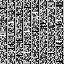

In [167]:
img

In [146]:
from scipy.misc import toimage
img2 = toimage(weights_array)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


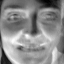

In [147]:
img2